Import necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [2]:
# data (original)
data=pd.read_csv('CustomerChurn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# load data information

In [3]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Finding number of row and column

In [4]:
data.shape

(7043, 21)

In [5]:
# as we can see totalcharges is object datatype so I convert it into float so its become easy to analyse
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').astype('float64')

In [6]:
# here I typescript the datatype of seniourCitizens into category
data['SeniorCitizen'] = data['SeniorCitizen'].astype('category')

In [7]:
# Modified data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# count the number of missing value for every column

In [8]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# cheaking missing values..
data_missing_TotalCharges=data[data['TotalCharges'].isnull()]
data_not_missing_TotalCharges=data[~data['TotalCharges'].isnull()]
print("Describe the missing data: ")
display(data_missing_TotalCharges.describe())
print("\nDescribe the non-missing data: ")
display(data_not_missing_TotalCharges.describe())

Describe the missing data: 


,tenure,MonthlyCharges,TotalCharges
count,11.0,11.000000,0.0
mean,0.0,41.418182,NaN
std,0.0,23.831484,NaN
min,0.0,19.700000,NaN
25%,0.0,20.125000,NaN
50%,0.0,25.750000,NaN
75%,0.0,58.975000,NaN
max,0.0,80.850000,NaN



Describe the non-missing data: 


,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [10]:
# So to modifiy the data we have fill the NA value to median
numeric_columns=['TotalCharges']
for nc in numeric_columns:
    data.loc[data[nc].isnull(),nc]=data[nc].mean()

In [11]:
#Again checking the count of null value
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# Now our next task is to remove the unused column from data set

In [13]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# which columns are deleted form dataset shown here

In [14]:
data=data.drop(['customerID','Partner','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','Contract','PaperlessBilling','PaymentMethod'],axis=1)

In [15]:
data.head(20)

,gender,SeniorCitizen,Dependents,tenure,MultipleLines,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,1,No phone service,No,No,No,29.85,29.85,No
1,Male,0,No,34,No,No,No,No,56.95,1889.50,No
2,Male,0,No,2,No,No,No,No,53.85,108.15,Yes
3,Male,0,No,45,No phone service,Yes,No,No,42.30,1840.75,No
4,Female,0,No,2,No,No,No,No,70.70,151.65,Yes
5,Female,0,No,8,Yes,No,Yes,Yes,99.65,820.50,Yes
6,Male,0,Yes,22,Yes,No,Yes,No,89.10,1949.40,No
7,Female,0,No,10,No phone service,No,No,No,29.75,301.90,No
8,Female,0,No,28,Yes,Yes,Yes,Yes,104.80,3046.05,Yes
9,Male,0,Yes,62,No,No,No,No,56.15,3487.95,No


In [16]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   gender           7043 non-null   object  
 1   SeniorCitizen    7043 non-null   category
 2   Dependents       7043 non-null   object  
 3   tenure           7043 non-null   int64   
 4   MultipleLines    7043 non-null   object  
 5   TechSupport      7043 non-null   object  
 6   StreamingTV      7043 non-null   object  
 7   StreamingMovies  7043 non-null   object  
 8   MonthlyCharges   7043 non-null   float64 
 9   TotalCharges     7043 non-null   float64 
 10  Churn            7043 non-null   object  
dtypes: category(1), float64(2), int64(1), object(7)
memory usage: 557.4+ KB


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# Now I perfom data visualisation

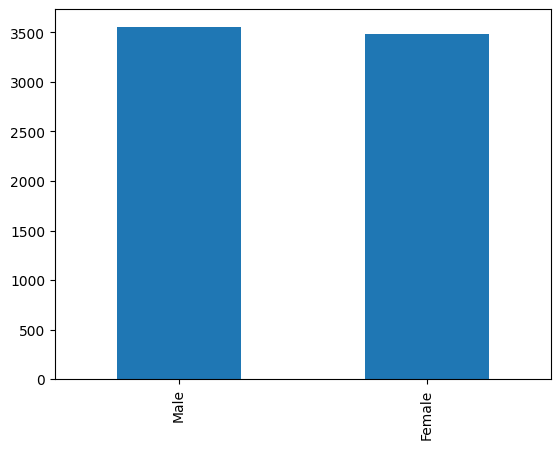

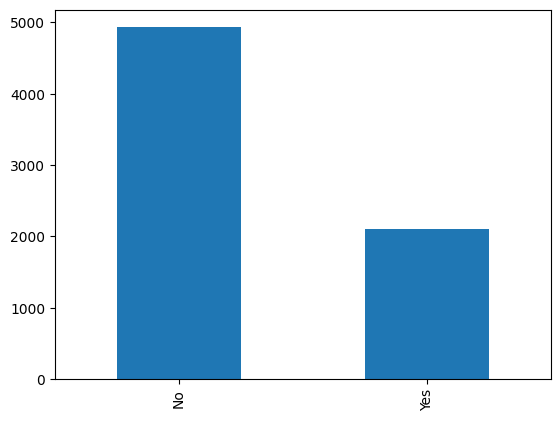

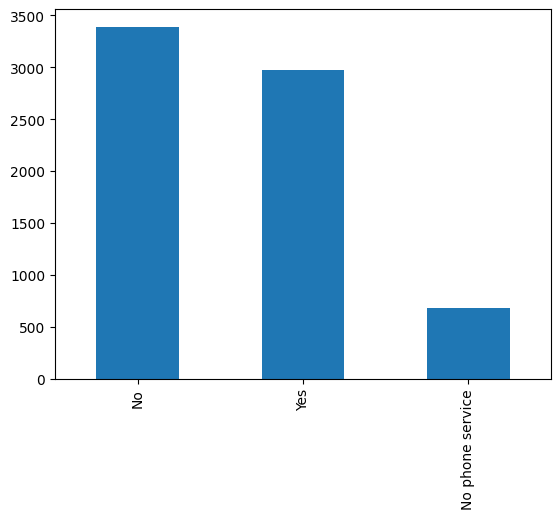

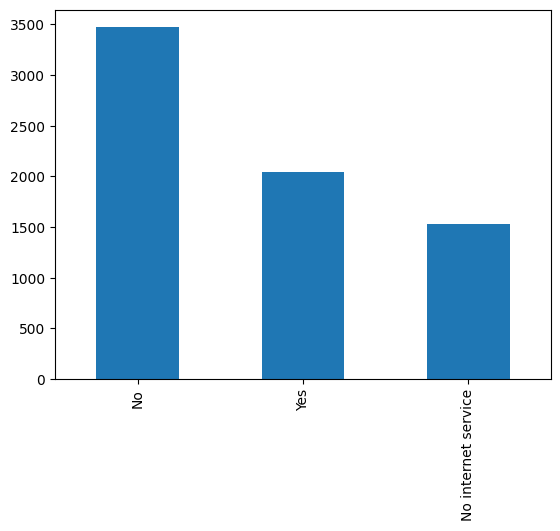

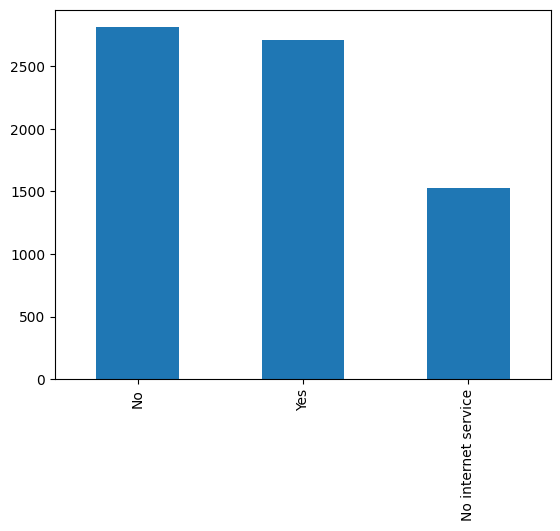

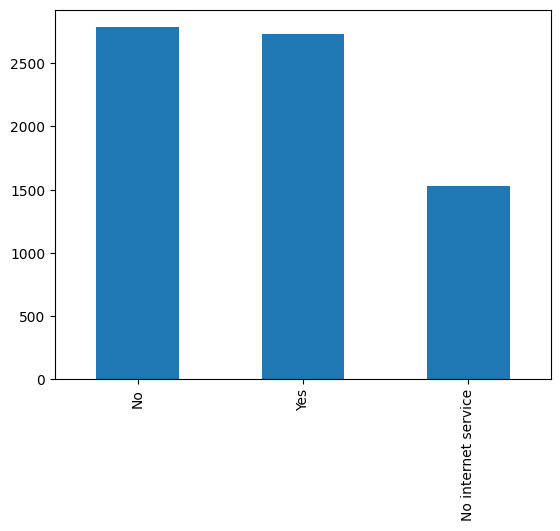

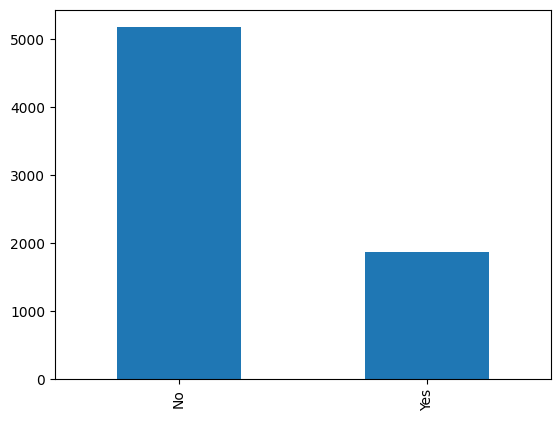

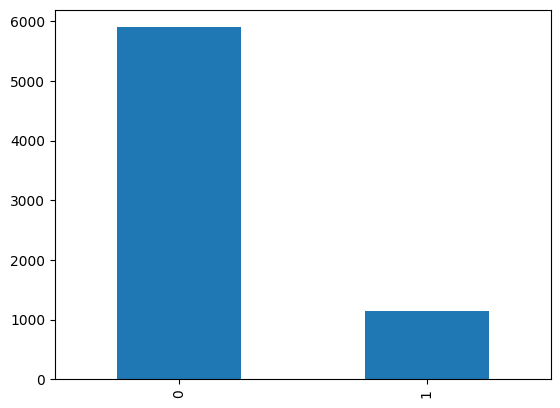

In [17]:
#Gender vs result
data['gender'].value_counts().plot(kind='bar')
plt.show()
# Dependencied
data['Dependents'].value_counts().plot(kind='bar')
plt.show()
# MultipleLines 
data['MultipleLines'].value_counts().plot(kind='bar')
plt.show()
# TechSupport
data['TechSupport'].value_counts().plot(kind='bar')
plt.show()
# streaming TV
data['StreamingTV'].value_counts().plot(kind='bar')
plt.show()
# streming movies
data['StreamingMovies'].value_counts().plot(kind='bar')
plt.show()
 # churn
data['Churn'].value_counts().plot(kind='bar')
plt.show()
# histrograp for seniour citizen
data['SeniorCitizen'].value_counts().plot(kind='bar')
plt.show()

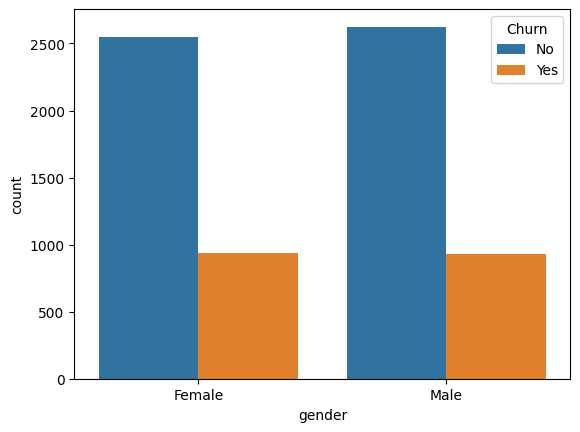

In [18]:
sns.countplot(data=data,x='gender',hue='Churn')
plt.show()

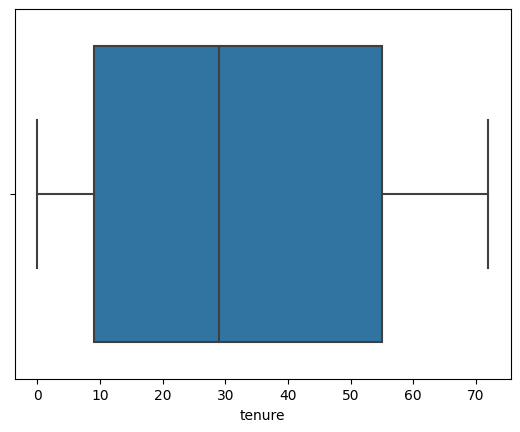

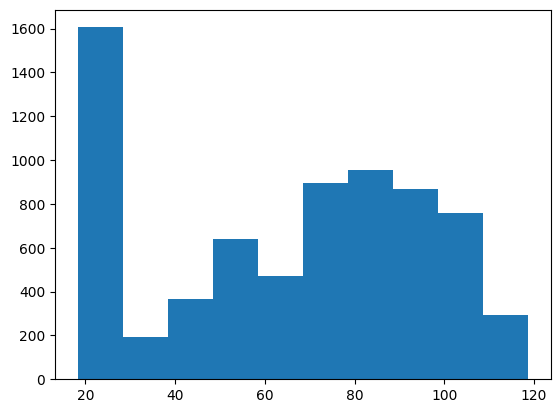

<function matplotlib.pyplot.show(close=None, block=None)>

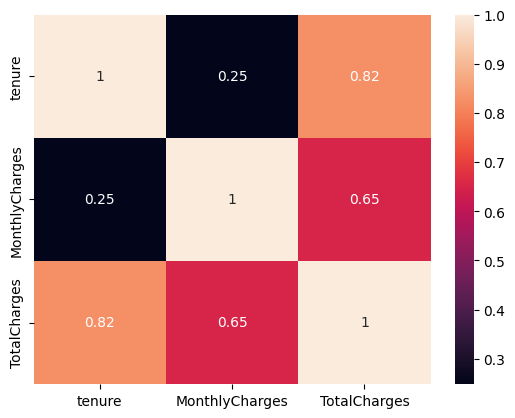

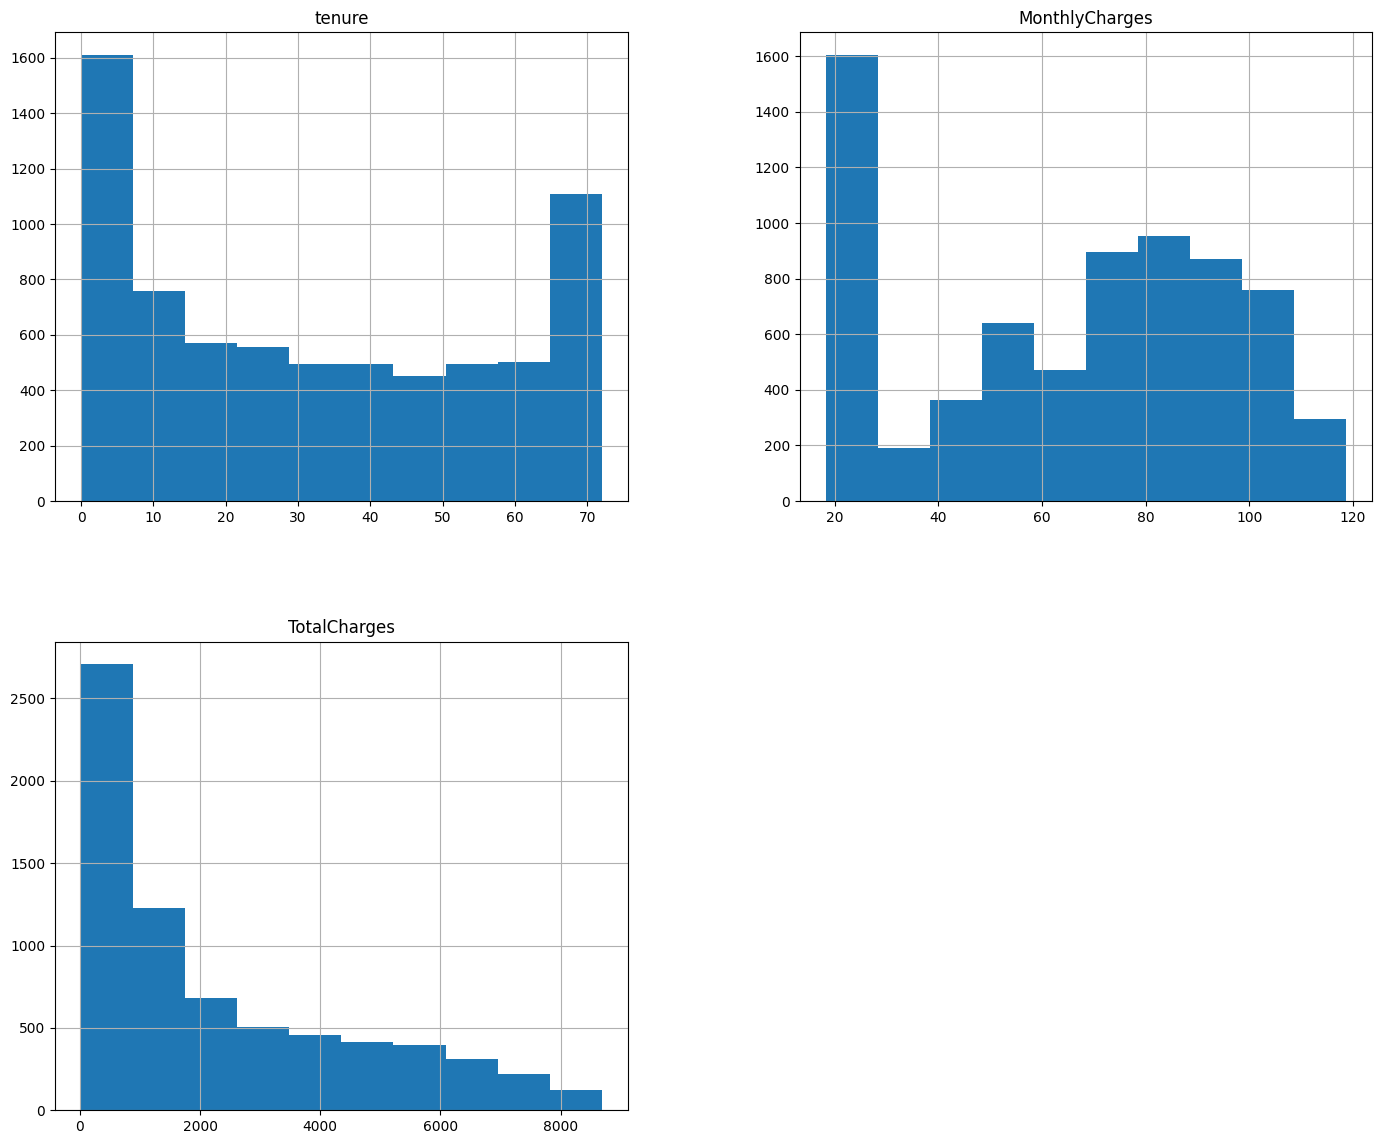

In [19]:
# histrogram for tenur
sns.boxplot(x='tenure',data=data)
plt.show()
# histrigraph for monthly charges
plt.hist(data['MonthlyCharges'])
plt.show()
# correlation matrix
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)
# plotting the data distrubution plots
data.hist(figsize=(17,14))
plt.show

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


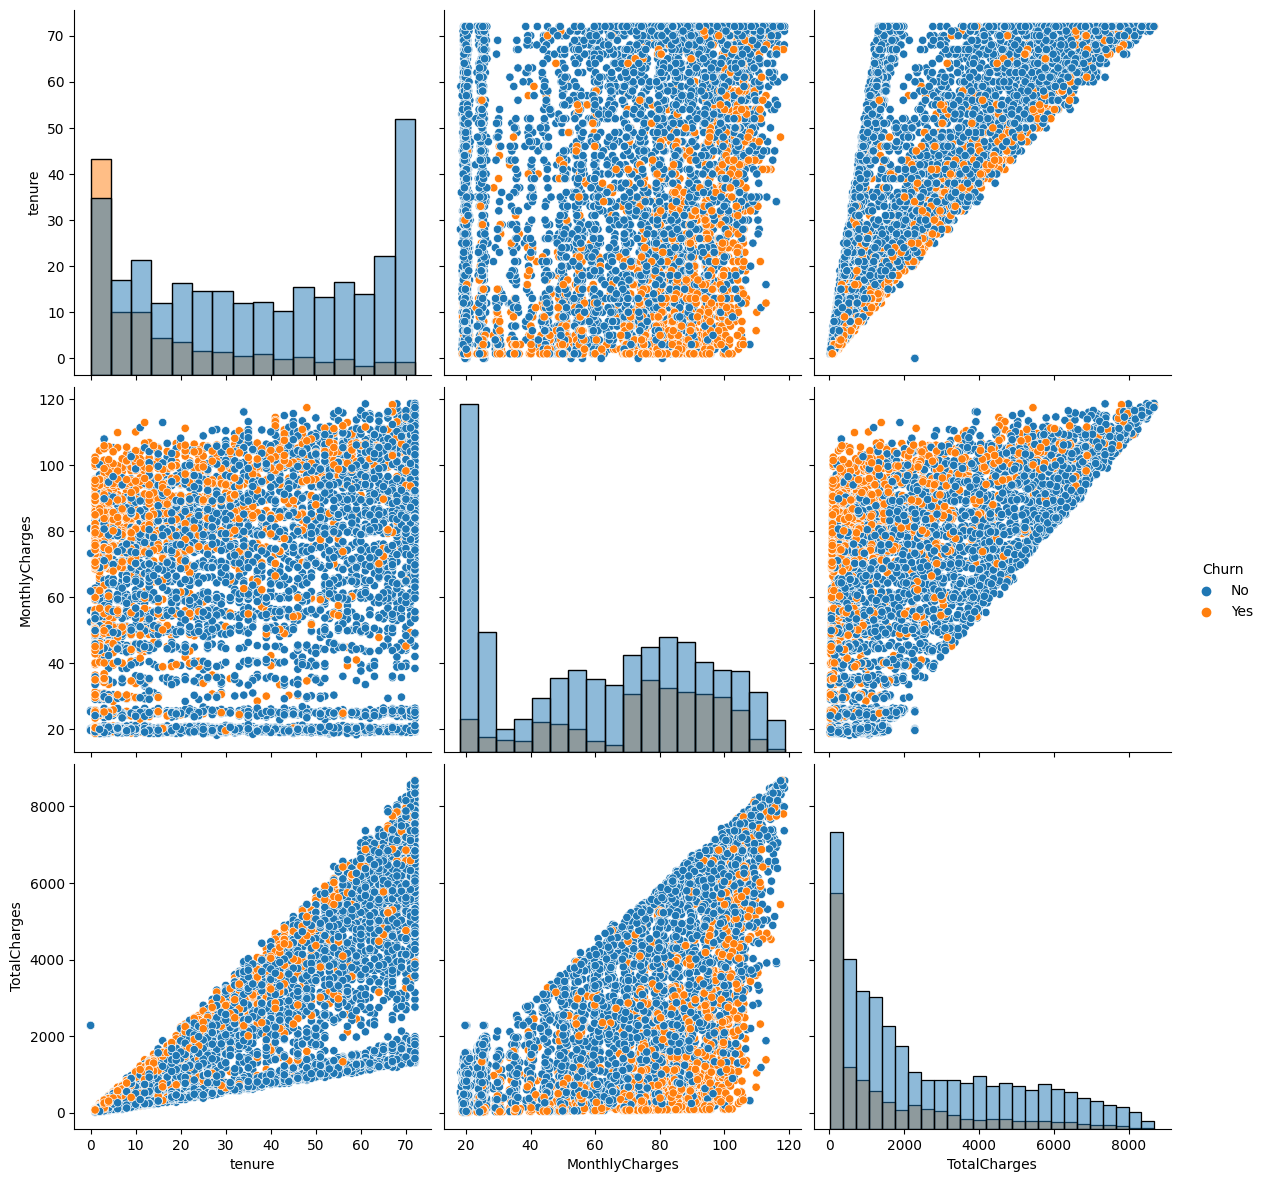

In [20]:
sns.pairplot(data,hue='Churn',size=4,diag_kind="hist")
plt.show()

# CORRELATION

In [21]:
# CORRELATION ANALYSIS
print("Covariance: \n")
display(data.cov(numeric_only=True))
print("Correlation: ")
display(data.corr(numeric_only=True))

Covariance: 



,tenure,MonthlyCharges,TotalCharges
tenure,603.168108,183.196987,4.587897e+04
MonthlyCharges,183.196987,905.410934,4.433198e+04
TotalCharges,45878.965591,44331.975693,5.130226e+06


Correlation: 


,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.824757
MonthlyCharges,0.247900,1.000000,0.650468
TotalCharges,0.824757,0.650468,1.000000


In [22]:
print(data.describe())
# Checking for any significant difference in tenure between churned and retained customers
from scipy.stats import ttest_ind
churned = data[data['Churn'] == 'Yes']['tenure']
retained = data[data['Churn'] == 'No']['tenure']
t_stat, p_val = ttest_ind(churned, retained)
print(f"T-Statistic: {t_stat}, P-value: {p_val}")

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2265.000258
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1400.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000
T-Statistic: -31.57955051135377, P-value: 7.99905796059022e-205


In [23]:
# Convert categorical variables to numeric
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])
# Splitting the dataset into train and test sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Building the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predictions
predictions = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1382  157]
 [ 323  251]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1539
           1       0.62      0.44      0.51       574

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113

